# 項目：使用線性回歸預測房價數據

## 分析目標

此數據分析報告的目的是，基於現有的房屋銷售價格，以及有關該房屋的屬性，進行線性回歸分析，從而利用得到的線性回歸模型，能對以下未知售價的房屋根據屬性進行價格預測：

面積為 6500 平方英尺，有 4 個臥室、2 個廁所，總共 2 層，不位於主路，無客人房，帶地下室，有熱水器，沒有空調，車位數為 2，位於城市首選社區，簡裝修。

## 簡介

資料集`house_price.csv`記錄了超過五百棟房屋的交易價格，以及房屋的相關屬性信息，包括房屋面積、臥室數、廁所數、樓層數、是否位於主路、是否有客房，等等。

`house_price.csv`每列的意思如下：
- price：房屋出售價格
- area：房屋面積，以平方英尺為單位
- bedrooms：臥室數
- bathrooms：廁所數
- stories：樓層數
- mainroad：是否位於主路
    - yes 是
    - no 否
- guestroom：是否有客房
    - yes 是
    - no 否
- basement：是否有地下室
    - yes 是
    - no 否
- hotwaterheating：是否有熱水器
    - yes 是
    - no 否
- airconditioning：是否有空調
    - yes 是
    - no 否
- parking：車庫容量，以車輛數量為單位
- prefarea：是否位於城市首選社區
    - yes 是
    - no 否
- furnishingstatus：裝修狀態
    - furnished 精裝
    - semi-furnished 簡裝
    - unfurnished 毛坯

## 讀取數據

導入數據分析所需要的函示庫

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

導入資料分析所需的函式庫，並透過Pandas的`read_csv`函數，將原始資料檔"house_price.csv"裡的資料內容，解析為DataFrame並賦值給變數`original_data`。

In [8]:
original_data = pd.read_csv("house_price.csv")
original_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 評估和清理數據

在這一部分中，我們將對上一部分建立的`original_data`DataFrame所包含的資料進行評估和清理。

主要從兩個方面進行：結構和內容，即整齊度和乾淨度。

資料的結構性問題指不符合「每個變數為一行，每個觀察值為一列，每種類型的觀察單位為一個表格」這三個標準；資料的內容性問題包括存在遺失資料、重複資料、無效資料等。

為了區分開經過清理的資料和原始的數據，我們建立新的變數`cleaned_data`，讓它為`original_data`複製出的副本。我們之後的清理步驟都將被運用在`cleaned_data`上。

In [9]:
cleaned_data = original_data.copy()

### 數據整齊度

In [10]:
cleaned_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


從前 10 行的數據看起來，該資料集不存在結構性問題。

### 數據乾淨度

透過`info`，對數據內容進行大致了解。

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


從輸出結果來看，`cleaned_data`共有 545 個觀察值，變數不存在缺失值。

資料類型方面，我們已知`mainroad`（是否位於主路）、`guestroom`（是否有客房）、`basement`（是否有地下室）、`hotwaterheating`（是否有熱水器）、`airconditioning`（是否有空調）、`prefarea`（是否位於城市首選社區）、`furnishingstatus`（裝修狀態）都是分類數據，可以把數據類型都轉換為 Category。

In [12]:
cleaned_data["mainroad"] = cleaned_data["mainroad"].astype("category")
cleaned_data["guestroom"] = cleaned_data["guestroom"].astype("category")
cleaned_data["basement"] = cleaned_data["basement"].astype("category")
cleaned_data["hotwaterheating"] = cleaned_data["hotwaterheating"].astype("category")
cleaned_data["airconditioning"] = cleaned_data["airconditioning"].astype("category")
cleaned_data["prefarea"] = cleaned_data["prefarea"].astype("category")
cleaned_data["furnishingstatus"] = cleaned_data["furnishingstatus"].astype("category")

In [13]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### 處理缺失數據

從`info`方法的輸出結果來看，`cleaned_data`不存在缺失值，因此不需要對缺失資料進行處理。

#### 處理重複數據

根據資料變數的含義以及內容來看，允許變數重複，我們不需要對此資料檢查是否有重複值。

#### 處理不一致數據

不一致資料可能存在於所有分類變數中，我們要查看是否存在不同值實際指涉相同目標的情況。

In [14]:
cleaned_data["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [15]:
cleaned_data["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [16]:
cleaned_data["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [17]:
cleaned_data["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [18]:
cleaned_data["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [19]:
cleaned_data["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [20]:
cleaned_data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

從以上輸出結果來看，均不存在不一致數據。

#### 處理無效或錯誤數據

可以透過DataFrame的`describe`方法，對數值統計資訊進行快速了解。

In [21]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


從以上統計資料來看，`cleaned_data`裡不存在脫離現實意義的數值。

## 探索數據

在著手線性迴歸分析之前，我們可以先藉助資料視覺化，探索數值變數的分佈，以及與房價存在相關性的變量，為後續的進一步分析提供方向。

In [22]:
# 設置圖表色盤為"pastel"
sns.set_palette("pastel")

### 房價分佈

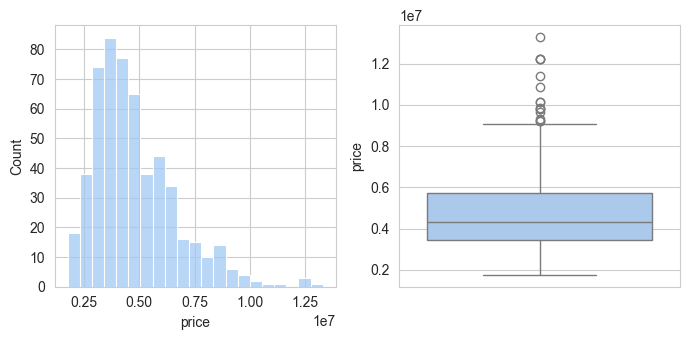

In [28]:
plt.rcParams["figure.figsize"] = [7.00, 3.5]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="price", ax=axes[0])
sns.boxplot(cleaned_data, y="price", ax=axes[1])
plt.show()

房價呈現右偏態分佈，顯示資料集中的大多數房子價格中等，但有一些價格很高的極端值，使得平均值被拉高。

### 面積分佈

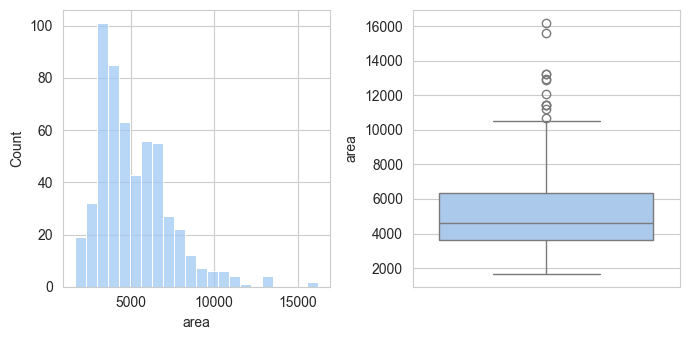

In [29]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="area", ax=axes[0])
sns.boxplot(cleaned_data, y="area", ax=axes[1])
plt.show()

面積的分佈與房價相似，也呈現右偏態分佈。

### 房價與面積的關係

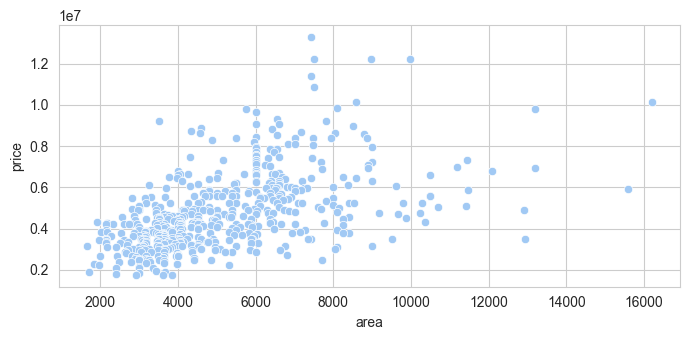

In [30]:
sns.scatterplot(cleaned_data, x="area", y="price")
plt.show()

從散佈圖來看，能大致看出一些正相關關係，但關係的強度需要後續透過計算相關性來得到。

### 臥室數與房價

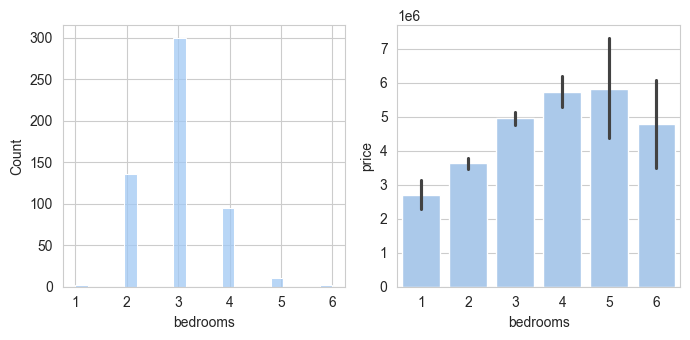

In [31]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="bedrooms", ax=axes[0])
sns.barplot(cleaned_data, x="bedrooms", y="price", ax=axes[1])
plt.show()

此資料集中房子的臥室數範圍為 1 - 6 個，其中大多房子有 2 - 4 個。

從平均房價與臥室數之間的長條圖來看，當臥室數小於 5 個時，臥室數多的房子價格也相應高，但一旦多於 5 個，房價並不一定相應更高。

### 洗手間數量與房價

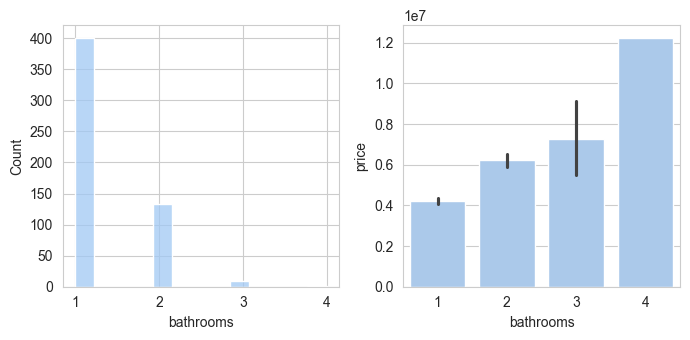

In [32]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="bathrooms", ax=axes[0])
sns.barplot(cleaned_data, x="bathrooms", y='price', ax=axes[1])
plt.show()

資料集中房子洗手間數量最少 1 個，最多 4 個，其中為 1 個的數量最多。

從平均房價與洗手間數之間的長條圖來看，洗手間多的房子價格也相應高。

### 樓層數與房價

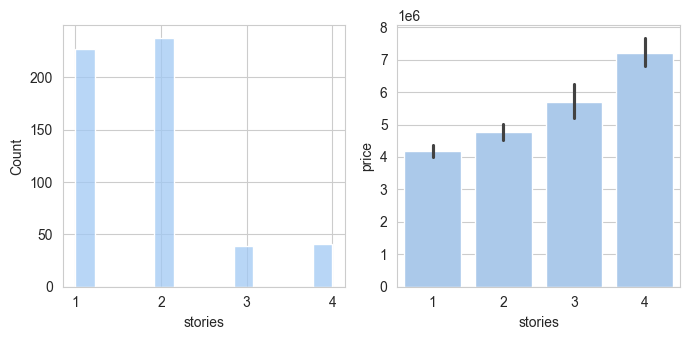

In [33]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="stories", ax=axes[0])
sns.barplot(cleaned_data, x="stories", y="price", ax=axes[1])
plt.show()

此資料集中房子的樓層數範圍為 1 - 4 層，其中大多房子有1層或2層。

從平均房價與樓層數之間的長條圖來看，樓層多的房子價格也相應高。

### 車庫數與房價

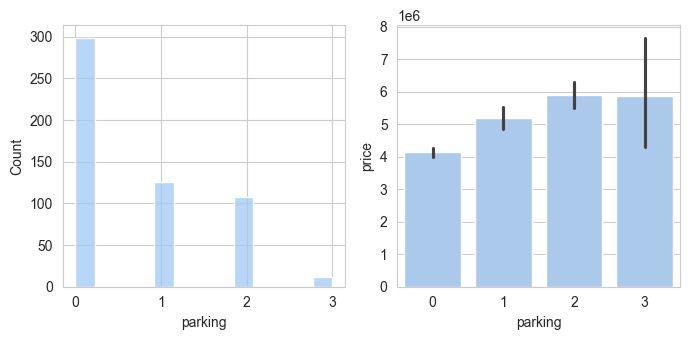

In [34]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x="parking", ax=axes[0])
sns.barplot(cleaned_data, x="parking", y="price", ax=axes[1])
plt.show()

此資料集中房子的車庫數範圍為 0 - 3 個，不帶車庫的房子數量是最多的，其次是 1 個和 2 個。

從平均房價與樓層數之間的長條圖來看，車庫多的房子價格也相應高，但超過 2 個後，房價並不一定相應更高。

### 是否在主路與房價

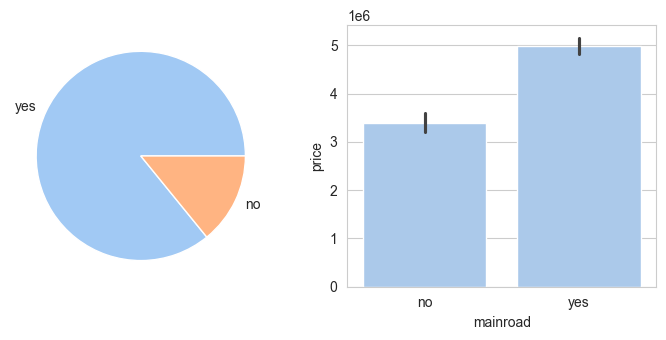

In [35]:
figure, axes = plt.subplots(1, 2)
mainroad_count = cleaned_data["mainroad"].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(cleaned_data, x="mainroad", y="price", ax=axes[1])
plt.show()

此資料集中房子大多位於主路。

從平均房價與樓層數之間的長條圖來看，在主路的房子價格也相應高。

### 是否有客人房與房價

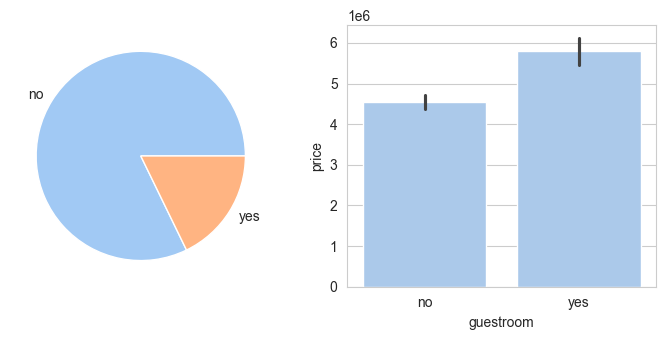

In [36]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_data["guestroom"].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label)
sns.barplot(cleaned_data, x="guestroom", y="price", ax=axes[1])
plt.show()

此資料集中房子大部分沒有客人房。

從平均房價與樓層數之間的長條圖來看，有客人房的房子價格也相對較高。

### 是否有地下室與房價

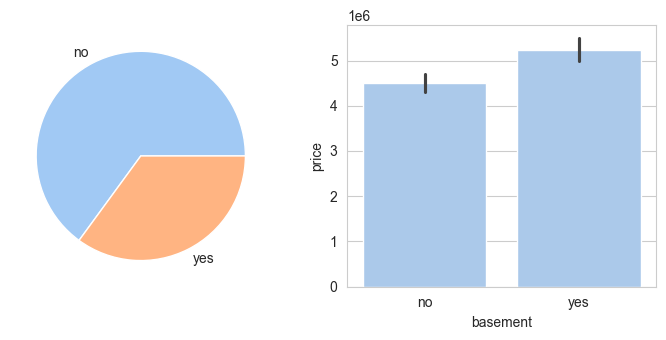

In [37]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_data["basement"].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label)
sns.barplot(cleaned_data, x="basement", y="price", ax=axes[1])
plt.show()

此數據集中更多的房子沒有地下室。

從平均房價與地下室之間的長條圖來看，有地下室的房子價格也相對較高。

### 是否有熱水器與房價

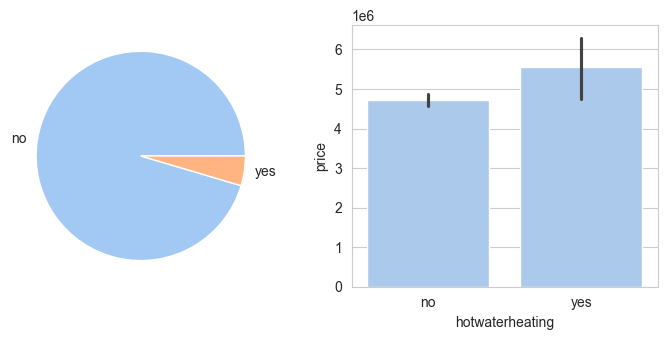

In [38]:
figure, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_data["hotwaterheating"].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label)
sns.barplot(cleaned_data, x="hotwaterheating", y="price", ax=axes[1])
plt.show()

此資料集中房子絕大部分沒有熱水器。

從平均房價與熱水器之間的長條圖來看，有熱水器的房子價格也相對較高。

### 是否有空調與房價

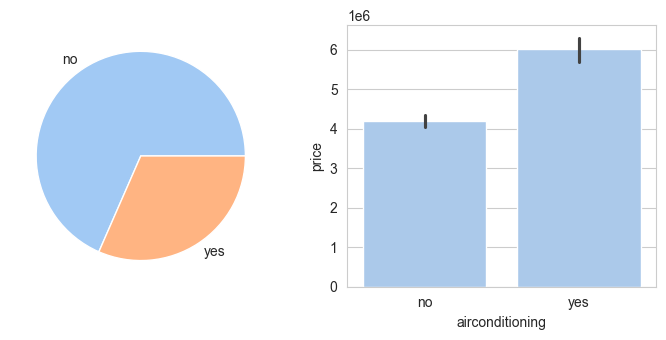

In [39]:
figure, axes = plt.subplots(1, 2)
airconditioning_count = cleaned_data["airconditioning"].value_counts()
airconditioning_label = hotwaterheating_count.index
axes[0].pie(airconditioning_count, labels=airconditioning_label)
sns.barplot(cleaned_data, x="airconditioning", y="price", ax=axes[1])
plt.show()

此數據集中更多的房子沒有空調。

從平均房價與空調之間的長條圖來看，有空調的房子價格也相應高。

### 是否位於城市首選社區與房價

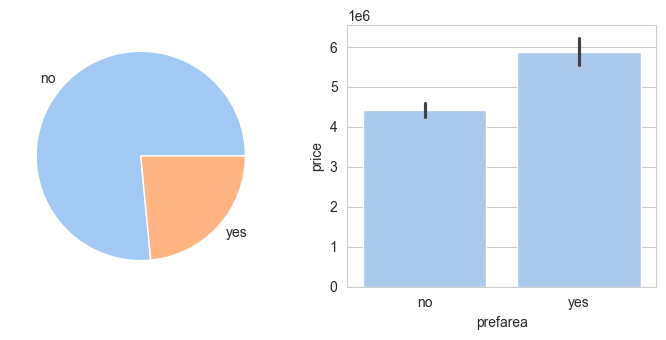

In [40]:
figure, axes = plt.subplots(1, 2)
prefarea_count = cleaned_data["prefarea"].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count, labels=prefarea_label)
sns.barplot(cleaned_data, x="prefarea", y='price', ax=axes[1])
plt.show()

此數據集中大部分房子不在城市首選社區。

從平均房價與城市首選社區之間的長條圖來看，在城市首選社區的房子價格也相應高。

### 裝修狀態與房價

/var/folders/_2/gx8y5f352h14d0fm7wd9dpzc0000gn/T/ipykernel_4471/4000980104.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')


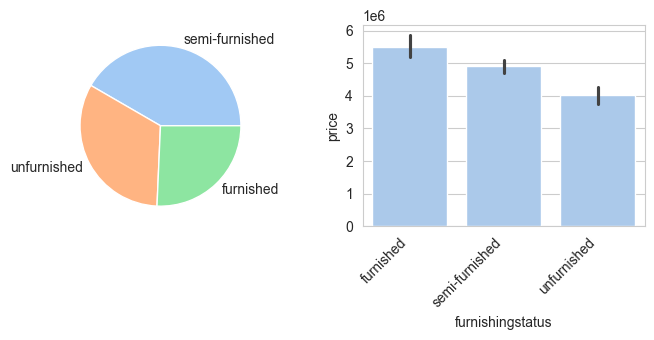

In [41]:
figure, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_data["furnishingstatus"].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label)
sns.barplot(cleaned_data, x="furnishingstatus", y="price", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

此資料集中簡裝和毛坯的房子較多，1/4 左右房子為精裝。

從平均房價與裝修狀態之間的長條圖來看，精裝的房子價格高於簡裝，簡裝高於毛坯。

## 分析數據

在分析步驟中，我們將利用`cleaned_data`的數據，進行線性迴歸分析，目標是得到一個可以根據房屋各個屬性對價格進行預測的數學模型。

然後可以建立一個新的DataFrame`lr_data`，讓它作為我們進行線性迴歸分析所使用的資料。

和`cleaned_data`區分開的原因是，我們在進行迴歸分析之前，還可能需要對資料進行一些準備，例如引入虛擬變量，這些都可以在`lr_data`上執行。

In [43]:
lr_data = cleaned_data.copy()

由於資料裡存在分類變量，無法直接建立線性迴歸模型。我們需要引入虛擬變量，也就是用 0 和 1 分別表示是否屬於該分類。

In [44]:
lr_data = pd.get_dummies(lr_data, 
                         drop_first=True, 
                         columns=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], 
                         dtype=int)
lr_data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下來，我們要把因變數和自變數劃分出來。

因變數是`price`變量，因為我們進行線性迴歸的目的，是得到一個能根據其它可能對房屋價格有影響的變量，來預測銷售價格的模型。

In [45]:
y = lr_data["price"]

我們可以把價格以外的都納入自變量，但需要查看它們之間的相關性。如果其中有些變數之間相關性很高，會導致共線性。

In [47]:
x = lr_data.drop('price', axis=1)

一般我們認為，當相關係數的絕對值大於 0.8 的時候，可能會導致嚴重共線性，所以我們檢查的時候，找絕對值大於 0.8 的值即可。

In [48]:
x.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


從上述輸出來看，不同變數之間相關係數的絕對值均小於或等於 0.8。

接下來，為模型的線性方程式加上截距。

In [49]:
x = sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以呼叫 OLS 函數，利用最小平方法來得到線性迴歸模型的參數值。

In [51]:
model = sm.OLS(y, x).fit()

為了查看模型結果，我們使用`summary`方法來獲得結果資訊。

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 13 Sep 2024   Prob (F-statistic):          9.07e-123
Time:                        22:37:34   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

當我們把顯著區間設定為0.05時，以上結果的P值可以看出，模型認為以下因素對房屋價格沒有顯著性影響：臥室數、是否為簡裝房。此外，常數（表示線性方程式的截距）的P值也很大，顯示也沒有顯著影響。

可以把這些變數移除後，再次建立線性迴歸模型。

In [53]:
x = x.drop(["const", "bedrooms", "furnishingstatus_semi-furnished"], axis=1)

In [55]:
model = sm.OLS(y, x).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:39:10   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，當我們把 P 值較大的自變數從線性迴歸模型中移除後，R 方的值從 0.682 成長到了 0.957，提高了模型對現有資料的適合度。

根據各個自變數在線性迴歸方程中的係數來看，模型預測以下因素的增加（或存在）會顯著增加房屋價格：房屋面積、廁所數、樓層數、車庫容量、位於主路、有客房、有地下室、有熱水器、有空調、位於城市首選社區。

線性迴歸模型預測以下因素的增加（或存在）會顯著降低房屋價格：房屋未經裝修，為毛坯房。

In [57]:
price_to_predict = pd.DataFrame({"area": [5600], "bedrooms": [4], "bathrooms": [2],"stories": [2], "mainroad": ["no"], "guestroom": ["no"], 
                                 "basement": ["yes"], "hotwaterheating": ["yes"], "airconditioning": ["no"], "parking": 2, "prefarea": ["yes"],
                                 "furnishingstatus": ["semi-furnished"]})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我們需要把分類變數的類型轉換為 Category，並且透過`categories`參數，讓程式知道所有可能的分類值。這樣做的原因是，預測資料包含的分類可能不全。我們需要確保引入虛擬變數的時候，不會漏掉某個或某些分類。

In [58]:
price_to_predict["mainroad"] = pd.Categorical(price_to_predict["mainroad"], categories=["no", "yes"])
price_to_predict["guestroom"] = pd.Categorical(price_to_predict["guestroom"], categories=["no", "yes"])
price_to_predict["basement"] = pd.Categorical(price_to_predict["basement"], categories=["no", "yes"])
price_to_predict["hotwaterheating"] = pd.Categorical(price_to_predict["hotwaterheating"], categories=["no", "yes"])
price_to_predict["airconditioning"] = pd.Categorical(price_to_predict["airconditioning"], categories=["no", "yes"])
price_to_predict["prefarea"] = pd.Categorical(price_to_predict["prefarea"], categories=["no", "yes"])
price_to_predict["furnishingstatus"] = pd.Categorical(price_to_predict["furnishingstatus"], categories=["furnished", "semi-furnished", "unfurnished"])

In [59]:
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


下一步，對分類變數引入虛擬變數。

In [60]:
price_to_predict = pd.get_dummies(price_to_predict, 
                                  drop_first=True, 
                                  columns=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning","prefarea", "furnishingstatus"], 
                                  dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


欄位要一致，刪除多出來的欄位

In [61]:
price_to_predict = price_to_predict.drop(["bedrooms", "furnishingstatus_semi-furnished"], axis=1)

In [62]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64

線性迴歸模型預測的價格為：7071927。